In [3]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1104k    0 1104k    0     0   404k      0 --:--:--  0:00:02 --:--:--  478k


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as pp
%matplotlib inline

In [35]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [37]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [39]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [40]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')


In [41]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [42]:
data.dropna().describe()

,West,East,Total
count,39377.000000,39377.000000,39377.000000
mean,53.549483,53.283567,106.833050
std,70.077714,77.265108,133.949586
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,27.000000,58.000000
75%,71.000000,65.000000,140.000000
max,698.000000,717.000000,957.000000


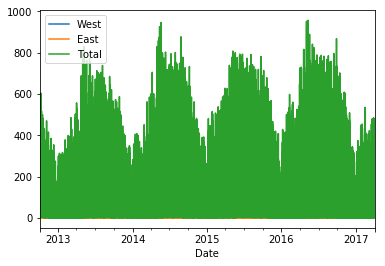

In [43]:
data.plot()

In [44]:
weekly = data.resample("W").sum()

In [45]:
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


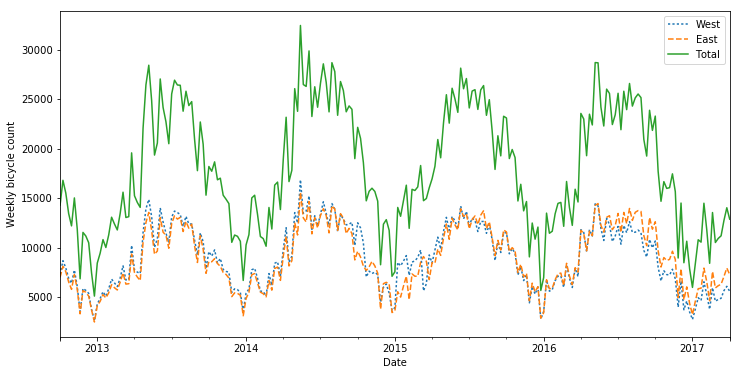

In [50]:
weekly.plot(style=[':','--','-'],figsize=(12,6))
pp.ylabel('Weekly bicycle count')

In [51]:
daily = data.resample("D").sum()

In [52]:
daily.head()

,West,East,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


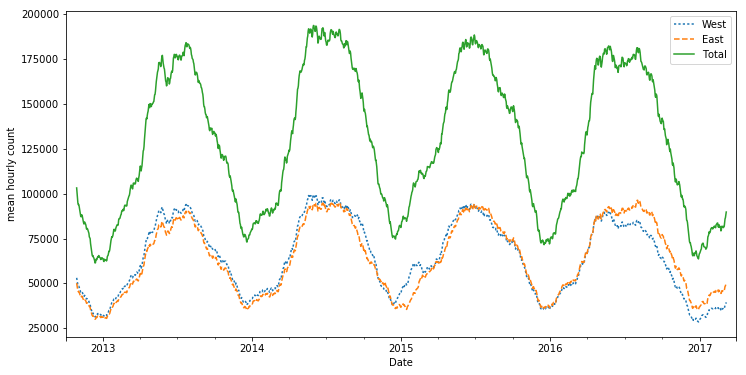

In [55]:
daily.rolling(50,center=True).sum().plot(style=[':','--','-'],figsize=(12,6))
pp.ylabel('mean hourly count')

In [56]:
by_time = data.groupby(data.index.time).mean()

In [57]:
by_time.head()

,West,East,Total
00:00:00,5.460085,6.861670,12.321755
01:00:00,3.037172,3.527727,6.564899
02:00:00,2.249695,2.189866,4.439560
03:00:00,1.636807,1.382084,3.018891
04:00:00,3.441194,2.580743,6.021938


In [58]:
hourly_ticks = 4*60*60*np.arange(6)

In [59]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

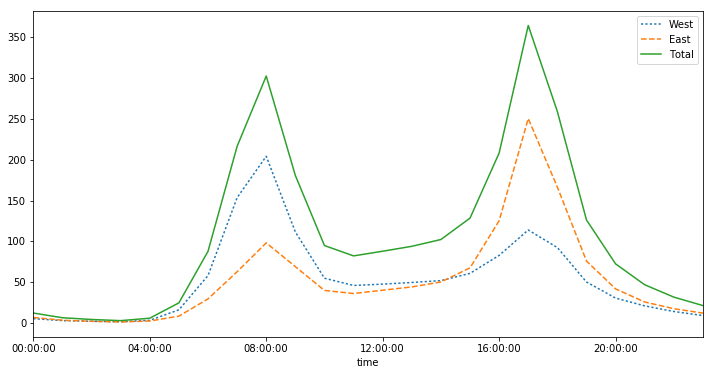

In [60]:
by_time.plot(xticks=hourly_ticks,style=[':','--','-'],figsize=(12,6))